In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 df= pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.shape

(284807, 31)

In [6]:
df = df.drop(columns = 'Time')
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
round(df['Class'].value_counts(normalize = True),4)*100

Class
0    99.83
1     0.17
Name: proportion, dtype: float64

In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

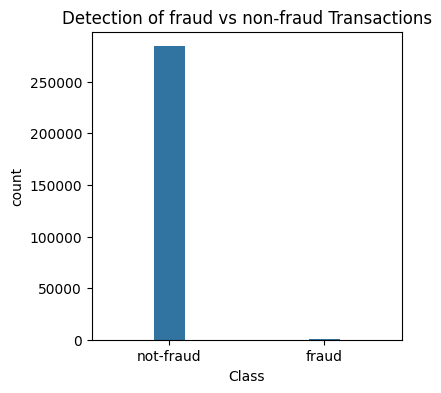

In [9]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'Class',data = df,width = 0.2)
plt.title('Detection of fraud vs non-fraud Transactions')
plt.xticks(ticks = [0,1], labels = ['not-fraud','fraud'])
plt.show()

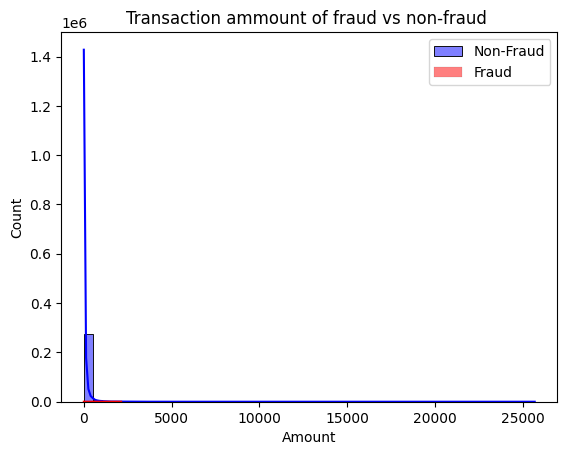

In [10]:
sns.histplot(x = df[df['Class']==0]['Amount'],bins = 50,color = 'Blue',label = 'Non-Fraud',kde = True)
sns.histplot(x = df[df['Class']==1]['Amount'],bins = 50,color = 'red',label = 'Fraud',kde = True)
plt.legend()
plt.title('Transaction ammount of fraud vs non-fraud ')
plt.show()

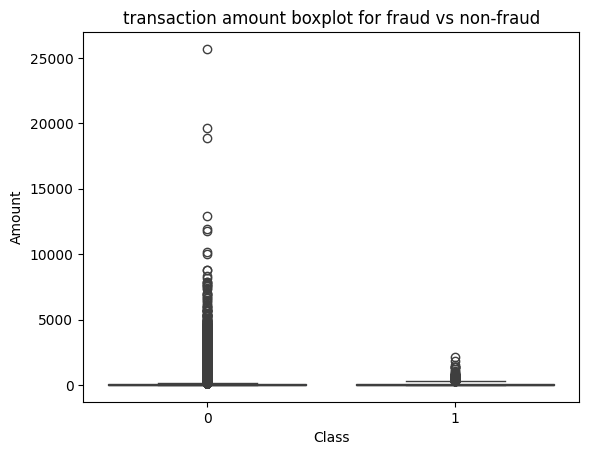

In [11]:
sns.boxplot(x = df['Class'],y = df['Amount'])
plt.title('transaction amount boxplot for fraud vs non-fraud')
plt.show()

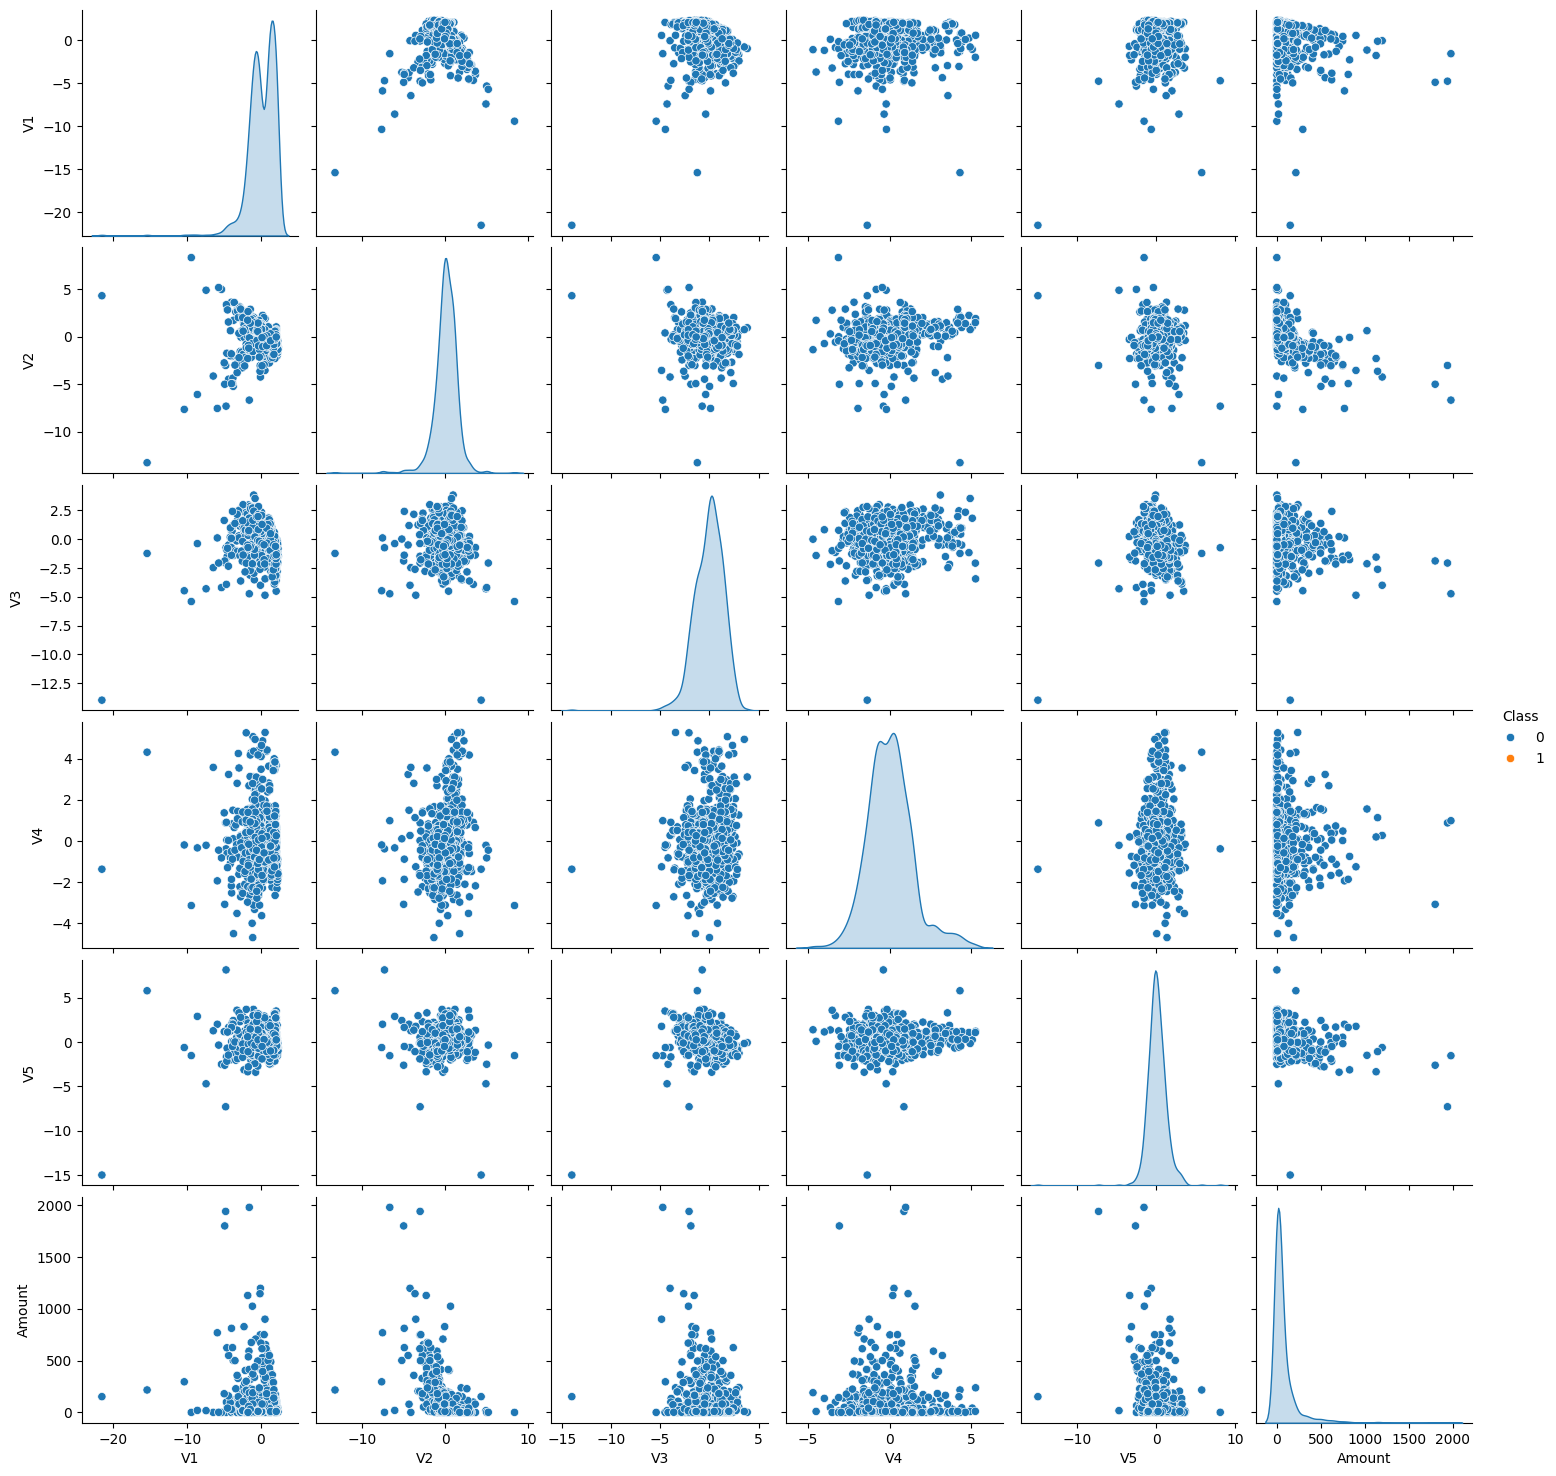

In [12]:
subset = df.sample(1000)
sns.pairplot(subset, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V4', 'V5','Amount'])
plt.show()

In [13]:
x = df.iloc[:,:-1]
y = df['Class']

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [16]:
df[['Amount']].describe()

,Amount
count,284807.000000
mean,0.003439
std,0.009736
min,0.000000
25%,0.000218
50%,0.000856
75%,0.003004
max,1.000000


In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(max_iter = 1000)

In [22]:
fe = SequentialFeatureSelector(lr,k_features = 5, forward = True)
fe.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          k_features=(5, 5), scoring='accuracy')

In [23]:
fe.k_feature_names_

('V8', 'V9', 'V12', 'V14', 'V16')

In [24]:
(fe.k_score_*100)

99.91660997608022

In [25]:
selected_feature = list(fe.k_feature_names_)
print('selected_feature',selected_feature)

selected_feature ['V8', 'V9', 'V12', 'V14', 'V16']


In [26]:
x_train_selected = x_train[selected_feature]
x_test_selected = x_test[selected_feature]

In [27]:
smote = SMOTE(sampling_strategy = 0.5,random_state = 42)
x_train_smote,y_train_smote = smote.fit_resample(x_train_selected,y_train)

In [28]:
lr.fit(x_train_smote,y_train_smote)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = lr.predict(x_test[selected_feature])

In [30]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [31]:
print('accuracy_score  ',round(accuracy_score(y_test,y_pred)*100, 2))
print('precision_score ',round(precision_score(y_test,y_pred)*100, 2))
print('recall_score    ',round(recall_score(y_test,y_pred)*100, 2))
print('f1_score        ',round(f1_score(y_test,y_pred)*100, 2))

accuracy_score   99.04
precision_score  13.8
recall_score     86.73
f1_score         23.81


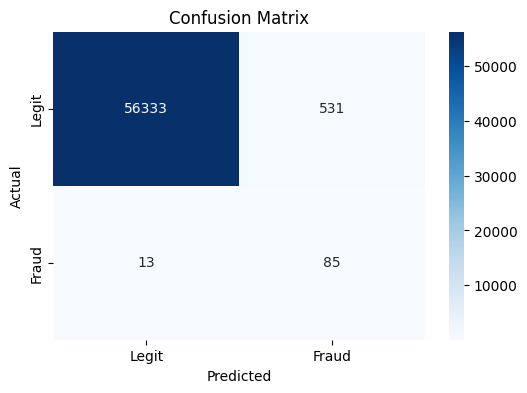

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Legit', 'Fraud']))


Classification Report:
               precision    recall  f1-score   support

       Legit       1.00      0.99      1.00     56864
       Fraud       0.14      0.87      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.62     56962
weighted avg       1.00      0.99      0.99     56962

